This notebook applies the Component TDA module to the MNIST dataset. The main focus is to generate the merge trees for the connected components and compare them to the classes' labels. 

In [1]:
import velour
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import gudhi
import pandas as pd
import Component_TDA as TDA

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

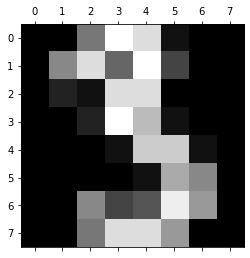

In [3]:
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

In [4]:
X_raw, y_raw = digits.data, digits.target

In [5]:
comp = TDA.ConnectedComponent(X = X_raw, split = 0.5, y = y_raw, balanced = True)

In [6]:
comp.X.shape

(890, 64)

Let us look at the distance distributions of the dataset

Text(0.5, 0, 'Eucledian distances')

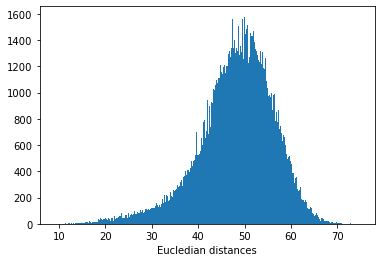

In [7]:
X = comp.X

dist_vector = []
for i in range(len(X)):
    for j in range(len(X)):
        if i < j:
            dif = X[j]-X[i]
            dist_vector.append(np.sqrt(np.dot(dif,dif)))
            
plt.hist(dist_vector, bins=1000)
plt.xlabel("Eucledian distances")

If we pick a "perfect" value for the cutting distance, we can get almost a state of art classifications *for the non-isolated part of the data*

In [8]:
comp.label_percentage(21, 30)

[[0, 41, (2, 1.0)],
 [1, 48, (3, 1.0)],
 [2, 67, (7, 1.0)],
 [3, 30, (5, 1.0)],
 [4, 82, (5, 0.012195121951219513), (6, 0.9878048780487805)],
 [5, 83, (0, 1.0)],
 [6, 53, (9, 1.0)],
 [7, 66, (4, 1.0)],
 [8, 48, (8, 0.041666666666666664), (1, 0.9583333333333334)]]

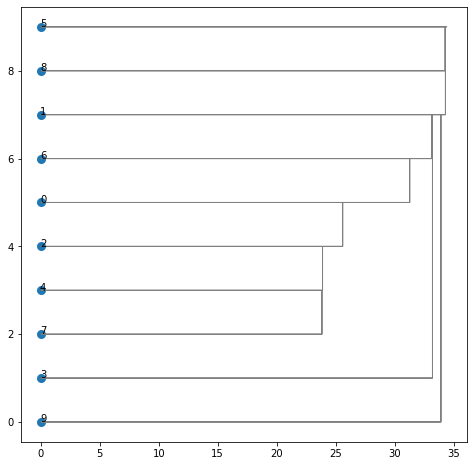

In [9]:
comp.MergeTree_representatives(21, 20) 

We can understand the choice of values for the cutting distance by the plot of distances. The perfect value is around the maximum number of classes.

In [10]:
len_vec = []
for i in range(14, 31):
    len_vec.append(len(comp.label_percentage(i, 20)))
    
len_vec

[0, 2, 3, 3, 5, 7, 8, 10, 11, 10, 8, 2, 1, 1, 1, 1, 1]

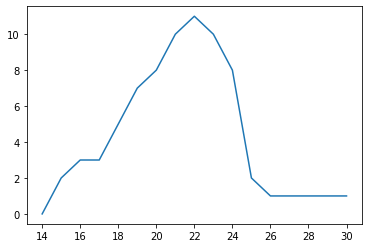

In [11]:
plt.plot(range(14, 31),len_vec)

In [12]:
comp.label_percentage(21.5, 20)

[[0, 44, (2, 1.0)],
 [1, 26, (8, 1.0)],
 [2, 72, (7, 1.0)],
 [3, 30, (5, 1.0)],
 [4, 20, (5, 1.0)],
 [5, 85, (5, 0.011764705882352941), (6, 0.9882352941176471)],
 [6, 86, (0, 1.0)],
 [7, 104, (9, 0.5288461538461539), (3, 0.47115384615384615)],
 [8, 74, (4, 1.0)],
 [9, 48, (8, 0.041666666666666664), (1, 0.9583333333333334)]]

It seems likely there are two main different ways of writing 5 (indices 3 and 4) and 9 and 3 merge pretty early on

In [13]:
numb_5_1_0 = comp.extract_component(21.5, 3, 20)[0].reshape(8,8)
numb_5_2_0 = comp.extract_component(21.5, 4, 20)[0].reshape(8,8)

numb_5_1_1 = comp.extract_component(21.5, 3, 20)[1].reshape(8,8)
numb_5_2_1 = comp.extract_component(21.5, 4, 20)[1].reshape(8,8)

numb_5_1_2 = comp.extract_component(21.5, 3, 20)[2].reshape(8,8)
numb_5_2_2 = comp.extract_component(21.5, 4, 20)[2].reshape(8,8)

numb_5_1_3 = comp.extract_component(21.5, 3, 20)[3].reshape(8,8)
numb_5_2_3 = comp.extract_component(21.5, 4, 20)[3].reshape(8,8)

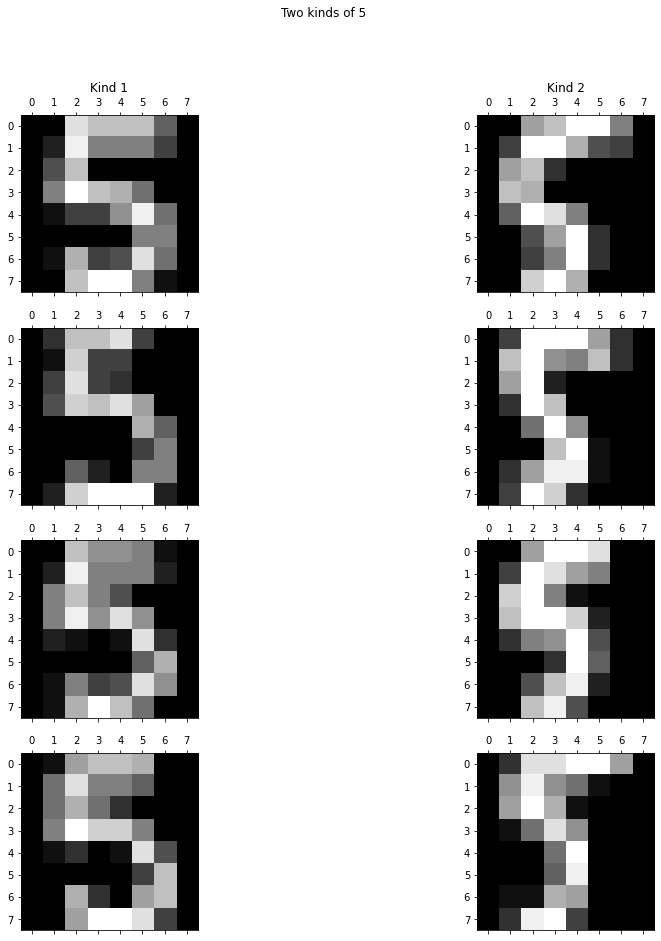

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15,15))
fig.suptitle('Two kinds of 5')
ax1.matshow(numb_5_1_0)
ax1.set_title('Kind 1')
ax2.matshow(numb_5_2_0)
ax2.set_title('Kind 2')

ax3.matshow(numb_5_1_1)
ax4.matshow(numb_5_2_1)

ax5.matshow(numb_5_1_2)
ax6.matshow(numb_5_2_2)

ax7.matshow(numb_5_1_3)
ax8.matshow(numb_5_2_3)

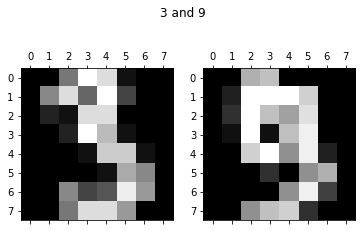

In [15]:
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.suptitle('3 and 9')
ax1.matshow(digits.images[3])
ax2.matshow(digits.images[9])

# So, it makees sense!